# Predicting Heart Disease

#### The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year. There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.The goal is to use the dataset to accurately predict the likelihood of a new patient having heart disease in the future.

In [1]:
import pandas as pd

#### Creating the dataframe from the csv file

In [2]:
df = pd.read_csv('heart_disease_prediction.csv')

In [3]:
df.head()#Displaying the first 5 rows of the dataframe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### To print the number of features and observations in the dataset. We use df.shape

In [4]:
rows , columns = df.shape #This gives us the number of rows and columns in the dataset

In [5]:
print(f'Number of observations: {rows}')
print(f'Number of observations: {columns}')

Number of observations: 918
Number of observations: 12


In [6]:
df.dtypes #This shows the different datatypes in the dataset

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
df.describe()#This provides a summary statistics for our dataset only for the int category.


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.describe(include = 'object')#This provides a summary statistics for our dataset only for the object category

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


#### Based on the descriptive statistics, here are some key observations:

- The average age of patients is approximately 53 years.
- The median Cholesterol level is about 25 mm/dl higher than the mean, suggesting a left-skewed distribution, possibly due to outliers.
- Both RestingBP and Cholesterol have a minimum value of zero.
- No missing values appear to be present in these columns.

##### A few key observations emerge: RestingBP, representing resting blood pressure, is unlikely to have a value of zero. Similarly, a serum cholesterol level of zero is also improbable, as confirmed by the American Heart Association’s definition, which combines HDL, LDL, and triglycerides. Domain expertise or further research would be useful to confirm these findings.

These insights might impact the prediction model, but further exploration is needed. So far, only a subset of columns has been examined, and the distribution of data relative to the target variable, HeartDisease, remains unknown. Next, we will explore the categorical features, using visualizations to understand the data distribution.

In [9]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


#### Let's check if there are empty slots in our dataset

In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
total_miss = df.isna().sum().sum()
print("The total number of missing values in all columns is:",total_miss )

The total number of missing values in all columns is: 0


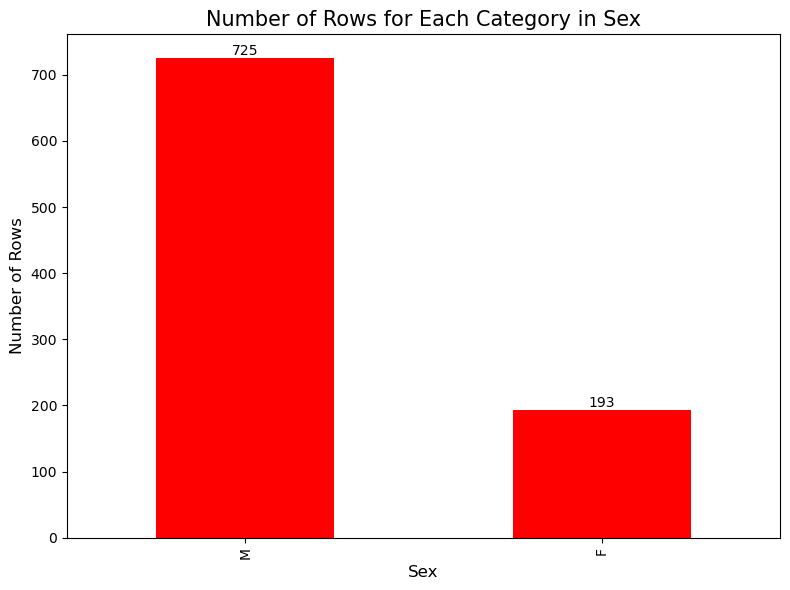

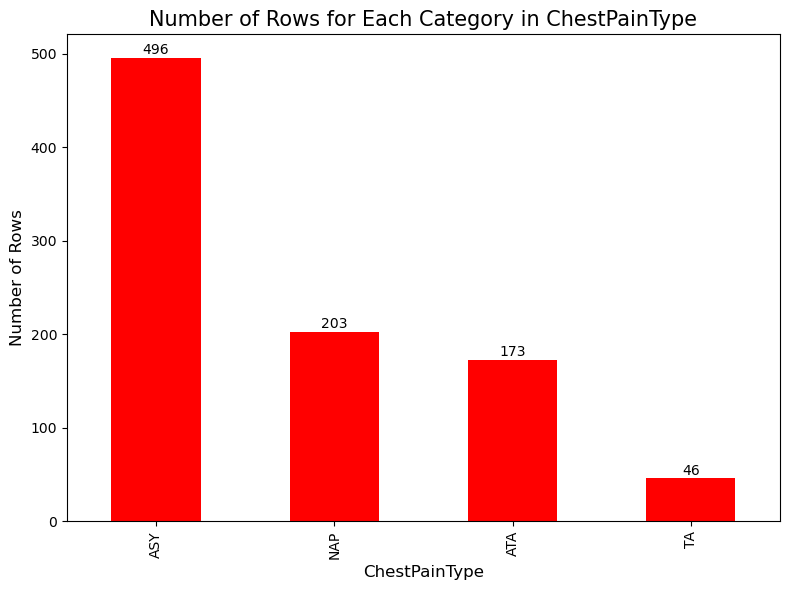

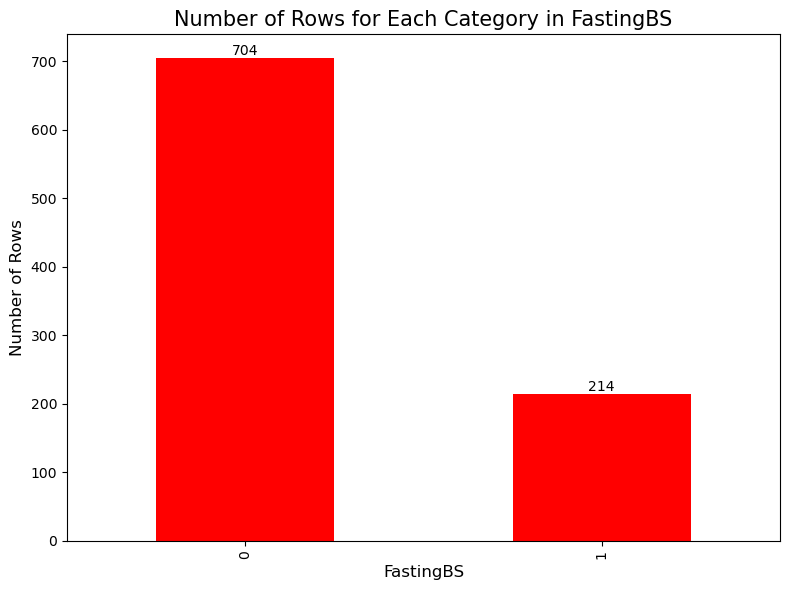

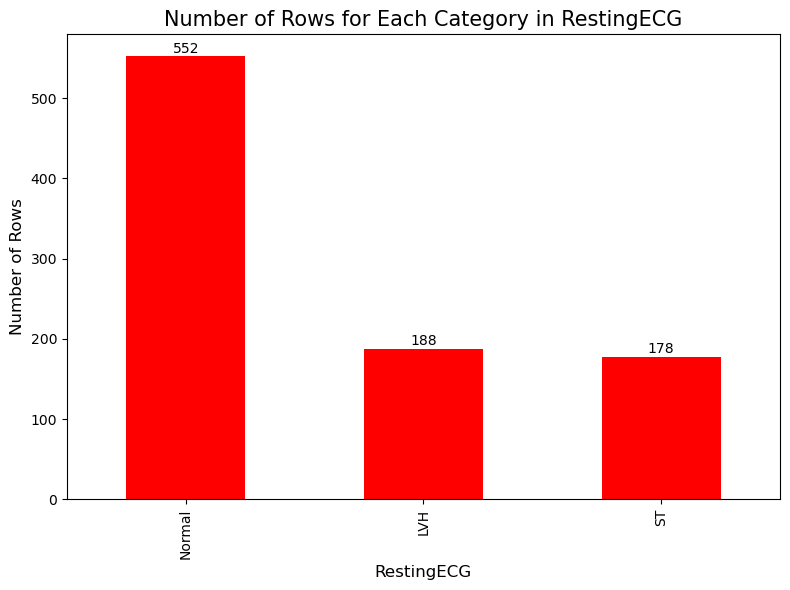

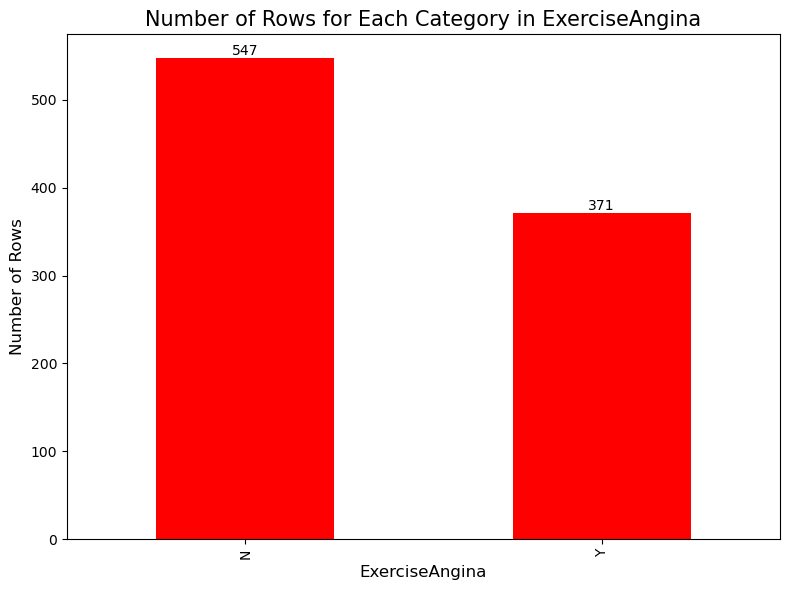

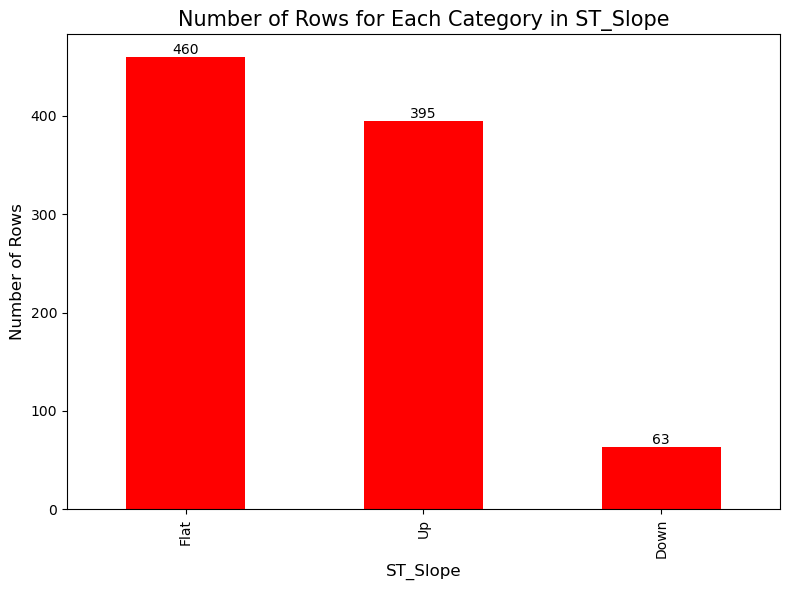

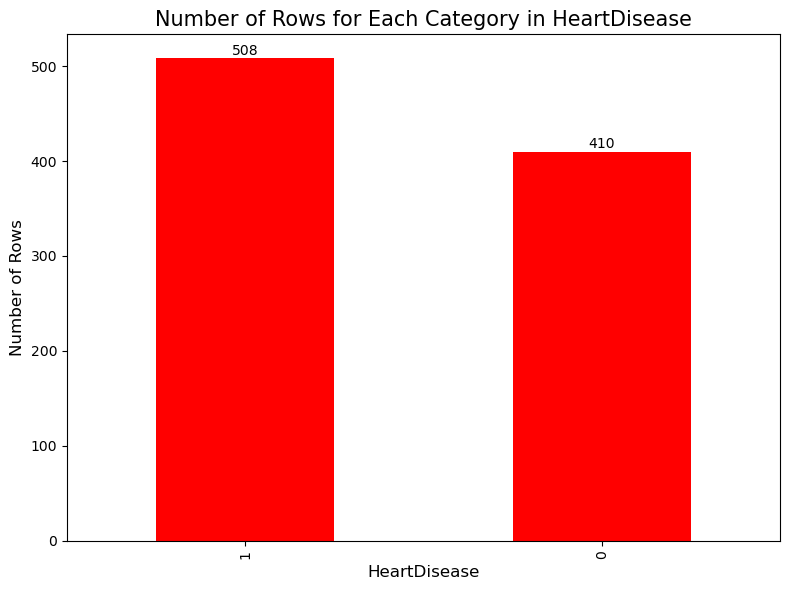

In [12]:

import matplotlib.pyplot as plt 
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


for col in categorical_columns:
    counts = df[col].value_counts()
    
    ax = counts.plot(kind='bar', color='red', figsize=(8, 6))
    
    ax.set_title(f'Number of Rows for Each Category in {col}', fontsize=15, color = 'black')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Number of Rows', fontsize=12)
    
    for patches in ax.patches:
        height = patches.get_height()
        ax.text(patches.get_x()+ patches.get_width() / 2,height+0.1, int(height), ha="center",va="bottom",fontsize=10)
        
    
    plt.tight_layout()  
    plt.show()
    
    

#### From the bar chart above, we can deduce that there are more cases of heart disease in male than in female


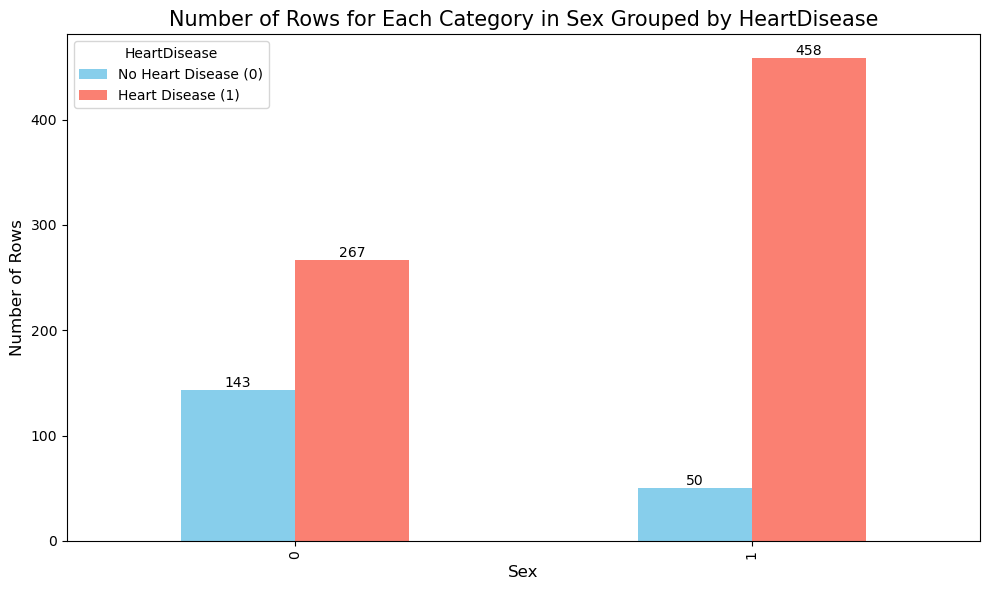

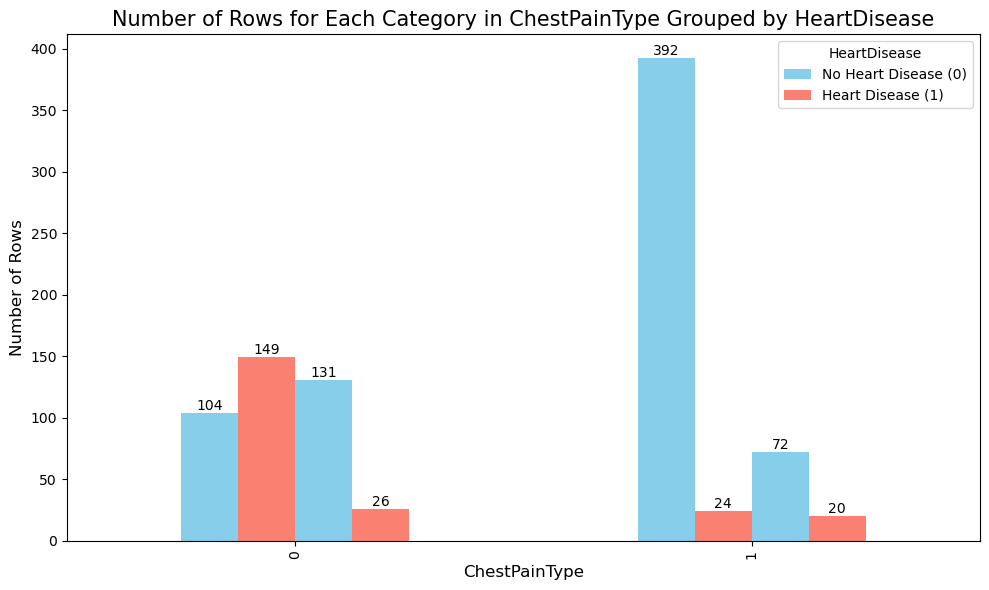

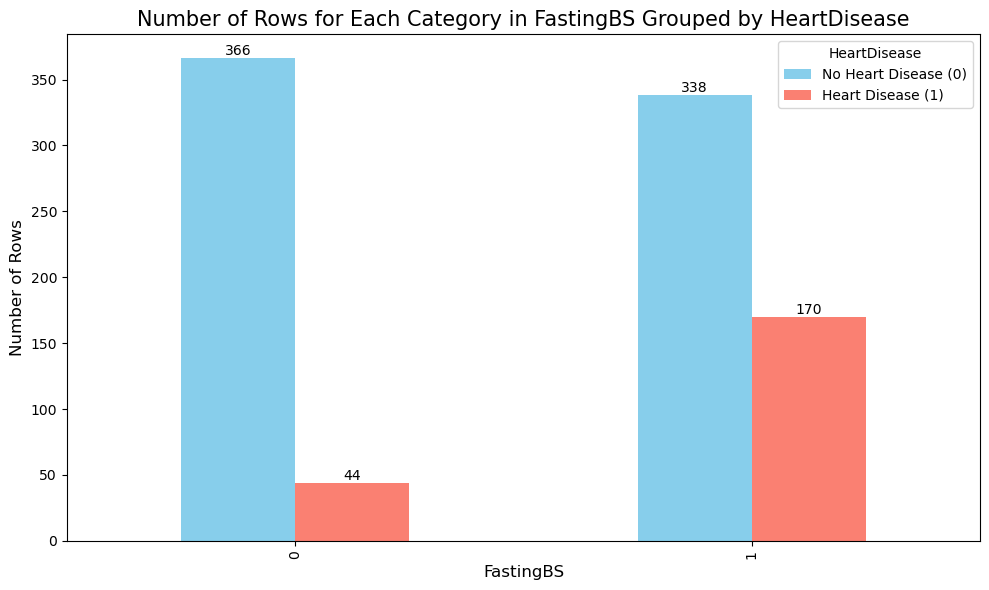

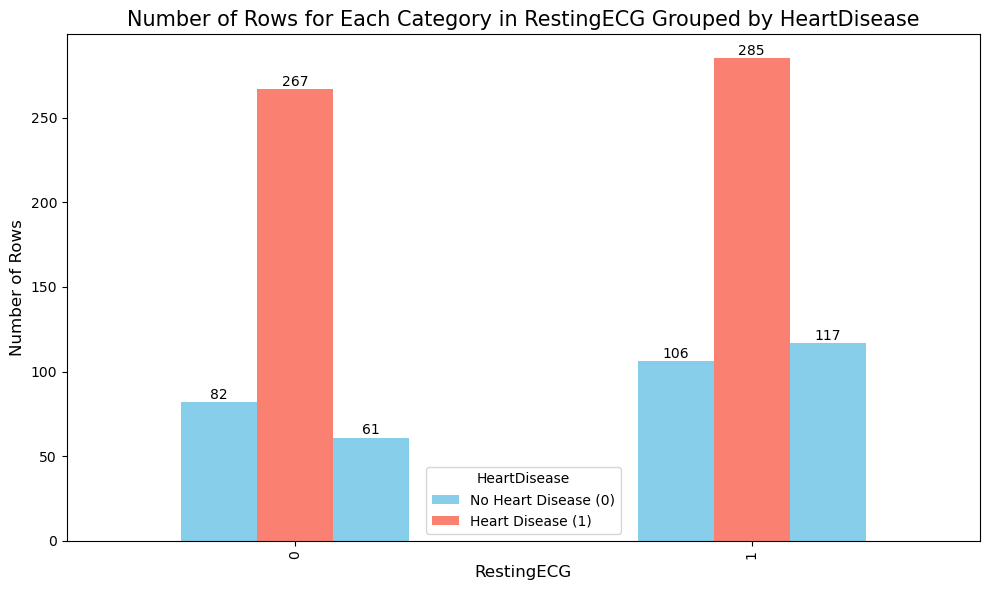

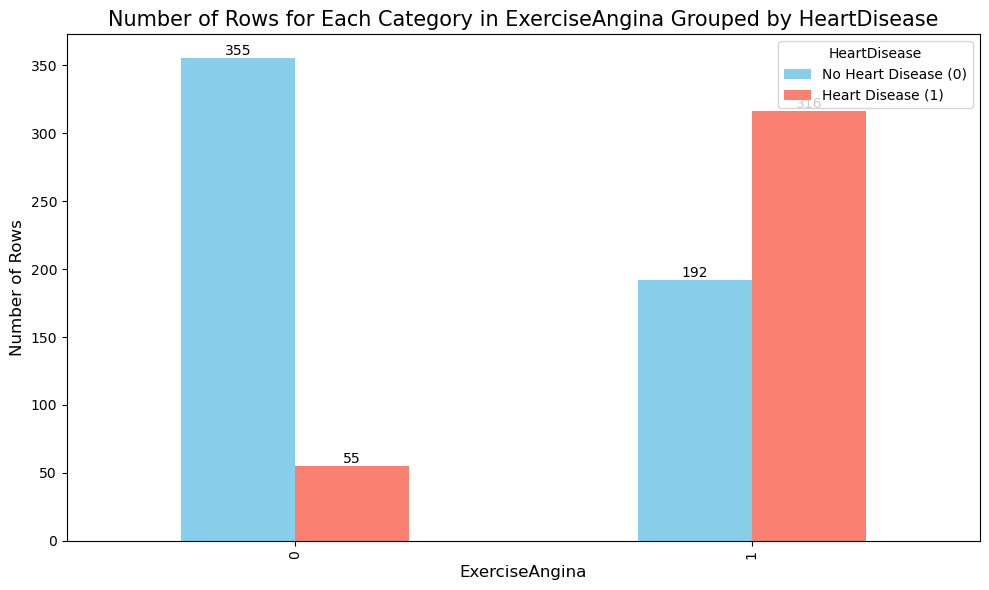

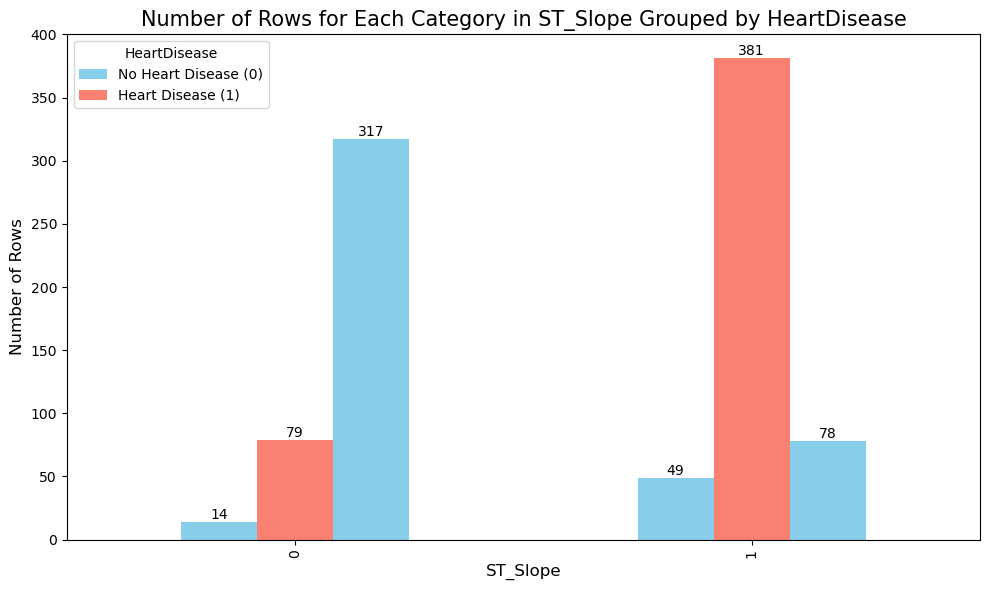

In [13]:
# List of categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Plotting loop
for col in categorical_columns:
   
    grouped_counts = df.groupby('HeartDisease')[col].value_counts().unstack(fill_value=0)
    
 
    ax = grouped_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
    
   
    ax.set_title(f'Number of Rows for Each Category in {col} Grouped by HeartDisease', fontsize=15)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Number of Rows', fontsize=12)
    ax.legend(['No Heart Disease (0)', 'Heart Disease (1)'], title='HeartDisease', fontsize=10)
    
    
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom', fontsize=10)
    
    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

Percentage of patients with heart disease who are male and over 50 years old: 67.72%


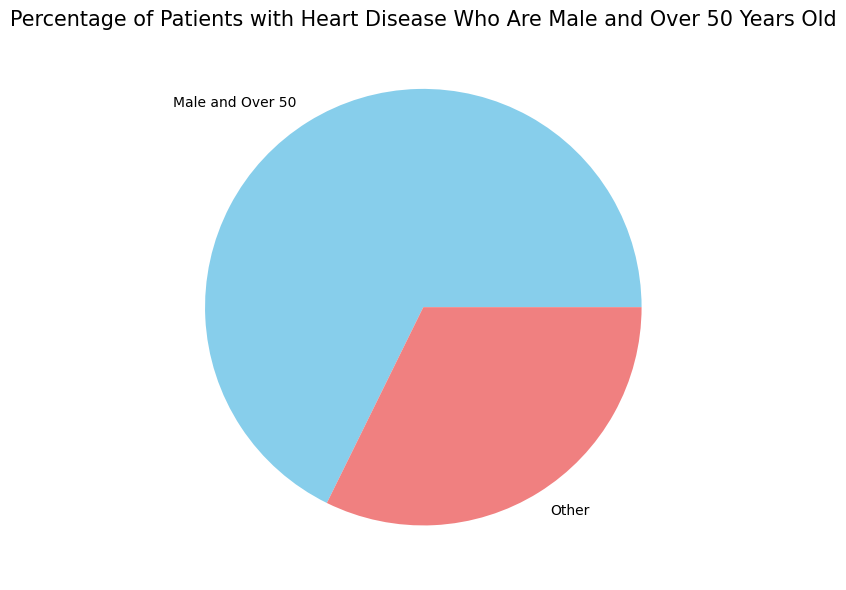

In [14]:
# Calculate the percentage of patients with heart disease who are male and over 50 years old
total_heart_disease = df[df['HeartDisease'] == 1]
male_over_50 = total_heart_disease[(total_heart_disease['Sex'] == 'M') & (total_heart_disease['Age'] > 50)]

percentage = (len(male_over_50) / len(total_heart_disease)) * 100


print(f"Percentage of patients with heart disease who are male and over 50 years old: {percentage:.2f}%")


labels = ['Male and Over 50', 'Other']
sizes = [len(male_over_50), len(total_heart_disease) - len(male_over_50)]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors)
plt.title('Percentage of Patients with Heart Disease Who Are Male and Over 50 Years Old', fontsize=15)
plt.tight_layout()
plt.show()

Median age of patients diagnosed with heart disease: 57.00


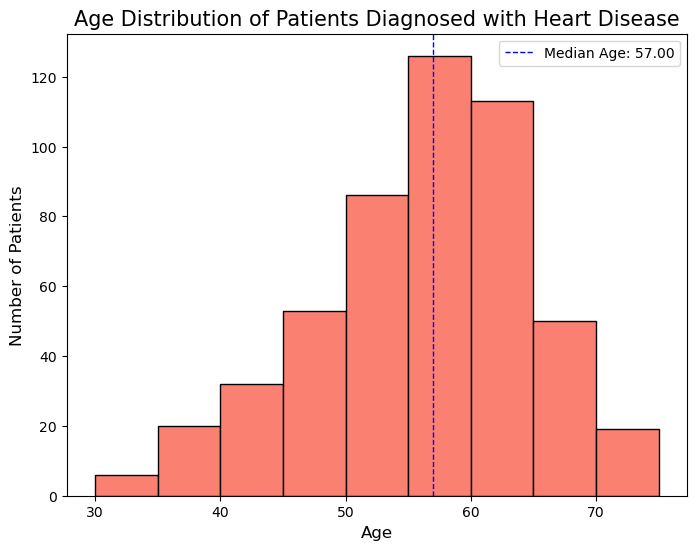

In [15]:
# Calculate the median age of patients with heart disease
median_age = total_heart_disease['Age'].median()

# Print the result
print(f"Median age of patients diagnosed with heart disease: {median_age:.2f}")

# Visualization: Histogram of ages for patients with heart disease
plt.figure(figsize=(8, 6))

plt.hist(total_heart_disease['Age'], bins=range(30, 80, 5), color='salmon', edgecolor='black')
plt.axvline(x =median_age, color='blue', linestyle='dashed', linewidth=1, label=f'Median Age: {median_age:.2f}')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Age Distribution of Patients Diagnosed with Heart Disease', fontsize=15)
plt.legend()
plt.show()


#### Count the number of rows that have a 0 value for RestingBP.

In [16]:
zero_RestingBP = df["RestingBP"]
count = 0
for i in zero_RestingBP:
    if i ==0:
        count+=1
        print("The number of rows having a zero value for the RestingBP is", count)

The number of rows having a zero value for the RestingBP is 1


#### Count the number of rows that have a 0 value for Cholesterol.

In [17]:
zero_cholesterol = df["Cholesterol"]
count = 0
zero_cholesterol_list=[]
for i in zero_cholesterol:
    if i ==0:
        count+=1
        zero_cholesterol_list.append(i)
print("The number of rows having a zero value for the Cholesterol is", len(zero_cholesterol_list))

The number of rows having a zero value for the Cholesterol is 172


### Remove the rows with zero values for both the RestingBP and Cholesterol

In [18]:
df = df[df['RestingBP'] != 0]

print(f"Number of rows after removing rows with RestingBP = 0: {len(df)}")



Number of rows after removing rows with RestingBP = 0: 917


In [19]:
df = df[df['Cholesterol'] != 0]
print(f"Number of rows after removing rows with Cholesterol = 0: {len(df)}")

Number of rows after removing rows with Cholesterol = 0: 746


### Converting categorical features into dummy variables to be used for the model

In [20]:
!pip install category_encoders
import category_encoders as cat_encoder 

df2 = df.copy()
categorical_columns = ['Age', 'Sex', 'ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']  # Replace with actual categorical column names
encoder = cat_encoder.BinaryEncoder(cols=categorical_columns)
df_category_encoder = encoder.fit_transform(df2)

display(df_category_encoder)


,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,...,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4,Oldpeak_5,ST_Slope_0,ST_Slope_1,HeartDisease_0,HeartDisease_1
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
2,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,1,1,0,1,0
4,0,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,0,1,1,1,0,1,1,0,...,0,0,1,1,0,1,1,0,1,0
914,1,0,1,1,0,1,0,1,0,1,...,0,1,1,1,1,0,1,0,1,0
915,0,1,1,1,0,0,0,1,0,1,...,0,0,1,1,0,1,1,0,1,0
916,0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0


### Create a Pearson's correlation heat map.

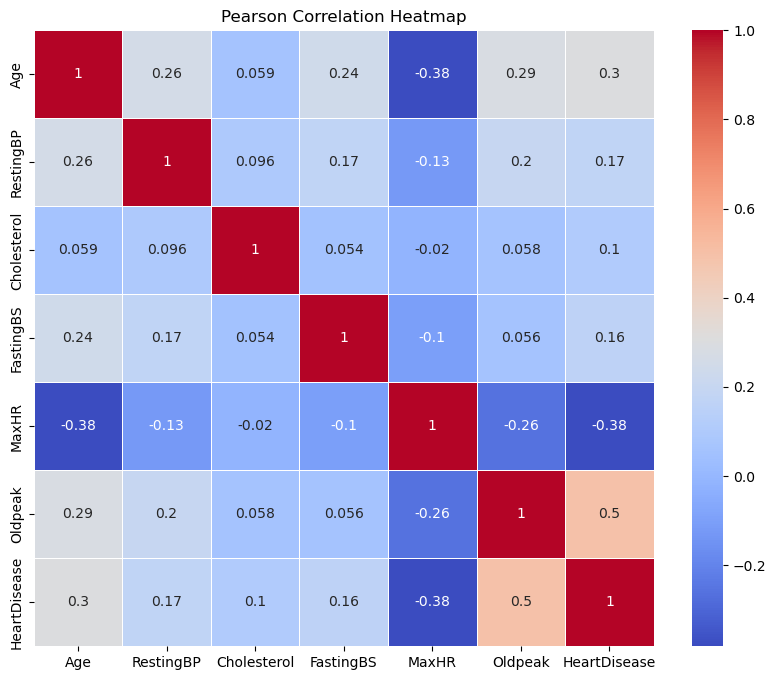

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')

plt.show()


### Selecting the features to use for the model based on the correlation matrix

In [22]:
selected_features = correlation_matrix['HeartDisease'] > 0.15
feature_names = selected_features.index[selected_features.values]
print("Selected features:", feature_names)

Selected features: Index(['Age', 'RestingBP', 'FastingBS', 'Oldpeak', 'HeartDisease'], dtype='object')


In [23]:
X = df2[['Age', 'RestingBP', 'FastingBS', 'Oldpeak']]
y = df2['HeartDisease']

In [24]:
X

,Age,RestingBP,FastingBS,Oldpeak
0,40,140,0,0.0
1,49,160,0,1.0
2,37,130,0,0.0
3,48,138,0,1.5
4,54,150,0,0.0
...,...,...,...,...
913,45,110,0,1.2
914,68,144,1,3.4
915,57,130,0,1.2
916,57,130,0,0.0


In [25]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 746, dtype: int64

### Using the KNN Classifier

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [27]:
selected_features = ['Age', 'RestingBP', 'FastingBS', 'Oldpeak']



In [28]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)#Train the model
knn.predict(X_test)#Test the model
knn.score(X_test,y_test)#Check the accuracy of the model

0.6333333333333333

In [29]:
X = df2.drop(columns = ['HeartDisease'])
y = df2['HeartDisease']

for features in X_train.columns:
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[features]],y_train)
    knn.predict(X_test[[features]])
    accuracy = knn.score(X_test[[features]],y_test)
    
    print(f"Accuracy of model using {features} : {accuracy * 100:.2f}%")

Accuracy of model using Age : 56.00%
Accuracy of model using RestingBP : 48.67%
Accuracy of model using FastingBS : 57.33%
Accuracy of model using Oldpeak : 76.00%


#### From the result above, the Oldpeak feature provides the most accurate model prediction

### Using MinMaxScaler, scale the selected features to the range (0, 1) and Create a K-NN model based on the new input

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


X = df2[['Age', 'RestingBP', 'FastingBS', 'Oldpeak']]
y = df2['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_val_scaled)


accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Validation Accuracy: 69.33%


### Hyper Tuning The Parameters

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

X = df2[['Age', 'RestingBP', 'FastingBS', 'Oldpeak']]
y = df2['HeartDisease']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],  
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'p': [1, 2, 3], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50]  
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, scoring='accuracy', cv=5) #Note that cv means cross validation

grid_search.fit(X_train_scaled, y_train)
print(f"Best accuracy: {grid_search.best_score_ * 100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


#### After running a grid search on the k-NN model using different hyperparameters, the model achieved an accuracy of 73.66% on the training set during cross-validation and 75.33% on the test set.
#### The best parameters for this model were: {'algorithm': 'brute', 'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}.

#### Compared to our previous attempt which was 69.33%, the grid search helped us find a more optimal set of hyperparameters, which resulted in a better-performing model. By exploring various configurations, we can refine the model and improve accuracy without overfitting. 

In [ ]:
new_person_data = np.array([[50, 130, 1, 1.5]])  
new_person_data_scaled = scaler.transform(new_person_data)
prediction = best_model.predict(new_person_data_scaled)


if prediction[0] == 1:
    print("The model predicts that the person has heart disease.")
else:
    print("The model predicts that the person does NOT have heart disease.")